Seleccione entre los rios Ebro,Tajo,Duero,Guadiana,Guadalquivir,Miño,Segura,Jucar: Ebro

Ha seleccionado Ebro 
Interte la cantidad que desea eliminar: 123
Interte el nombre del nuevo trasvase: asdf

Se quitarían 123 m3/s al caudal 426m3/s, de manera que quedarían 303


,nombre,caudal,longitud,nacimiento,desembocadura,comunidades,provincias,pais
0,Ebro,426m3/s,930km,Pico Tres Mares,Mar Mediterraneo,"[Cantabria, Castilla y Leon, La Rioja, Pais Va...","[Cantabria, Palencia, Burgos, La Rioja, Alava,...",España
1,Tajo,500m3/s,1038km,Fuente Garcia,Ocenano atlantico,"[Aragon, Castilla-La Mancha, Comunidad de Madr...","[Teruel, Guadalajara, Cuenca, Madrid, Toledo, ...",España
2,Duero,714m3/s,897km,Picos de Urbion,Oceano Atlantico,Castilla y Leon,"[Soria, Burgos, Valladolid, Zamora, Salamanca]",España
3,Guadiana,600m3/s,742Km,Villarunio de los Ojos,Oceano Atlantico,"[Castilla-La Mancha, Extremadura, Andalucia]","[Albacete, Ciudad Real, Badajoz, Huelva]",España
4,Guadalquivir,126m3/s,657Km,Cañada las Fuentes,Oceano Atlantico,Andalucia,"[Jaen, Cordoba, Sevilla, Huelva, Cadiz]",España
5,Miño,340m3/s,350Km,Pedregal de Irimia,Oceano Atlantico,Galicia,"[Lugo, Orense, Pontevedra, Viana do Castelo]",España
6,Segura,"26,3m3/s",325Km,Fuente Segura,Mar Mediterraneo,"[Andalucia, Castilla-La Mancha, Murcia, Comuni...","[Jaen, Albacete, Murcia, Alicante]",España
7,Jucar,"49,22m3/s",498Km,Cerro de San Felipe,Mar Mediterraneo,"[Castilla-La Mancha, Comunidad Valenciana]","[Cuenca, Albacete, Valencia]",España


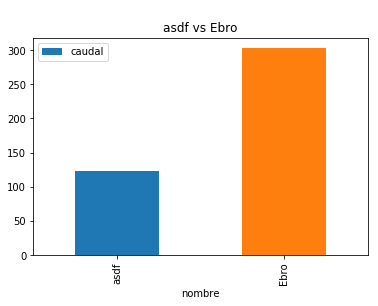

In [112]:
import pymongo 
import pandas as pd
from pymongo import MongoClient
client = MongoClient( 'localhost:27017')
db = client['rios']
rios = db.rios
rios=pd.DataFrame(list(rios.find()))

seleccionRio=str(input("Seleccione entre los rios Ebro,Tajo,Duero,Guadiana,Guadalquivir,Miño,Segura,Jucar: "))
arrayRios=["Ebro","Tajo","Duero","Guadiana","Guadalquivir","Miño","Segura","Jucar"]
print (f"\nHa seleccionado {seleccionRio} ")

def funcionComprobacionRepresentacionRios():
    cantidadCaudalQuitar=int(input("Interte la cantidad que desea eliminar: "))
    
    nombreTrasbase=str(input("Interte el nombre del nuevo trasvase: "))
    
    rioSeleccionadoOrigen=(rios.loc[rios['nombre']==seleccionRio])
    riorioSeleccionadoRecortado=rioSeleccionadoOrigen[['caudal','nombre']]
    caudal=rioSeleccionadoOrigen['caudal'].min()
    caudal1=caudal.split('m3/s')[0]
    caudalFinal=int(caudal1)-int(cantidadCaudalQuitar)
    porcentajeCaudal=(int((cantidadCaudalQuitar)*100)/int(caudal1))

    if porcentajeCaudal >= 50:
        print ('NO se puede superar el 20%')
    else:
        print(f"\nSe quitarían {cantidadCaudalQuitar} m3/s al caudal {caudal}, de manera que quedarían {caudalFinal}")
        rioNuevo={'caudal':[cantidadCaudalQuitar],'nombre':[nombreTrasbase]}
        df=pd.DataFrame(data=rioNuevo)

        rioSeleccionadoOrigenNuevo={'caudal':[caudalFinal],'nombre':[seleccionRio]}
        df2=pd.DataFrame(data=rioSeleccionadoOrigenNuevo)

        comparacionRioYTrasvase=pd.concat([df,df2],ignore_index=True,sort=True)
        comparacionRioYTrasvase.plot(kind='bar',y='caudal',x='nombre').set_title(f"\n{nombreTrasbase} vs {seleccionRio}")
        
for x in arrayRios:
    if x==seleccionRio:
        funcionComprobacionRepresentacionRios()


    


   
        
   


In [92]:
gato=2.2123123
gato2=10
jose=(int((gato*100)/int(gato2)))
print (jose)

22
